In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load data
data = np.load('development.npy')
# load metadata
development_df = pd.read_csv('metadata/development.csv')

# a) How would you group the 20 words and audio snippets labeled as “Other” in classes for the upcoming classification task and why?


word
other          4462
Fernseher      2046
Schraube       2046
Lüftung        2045
Leitung        2045
nicht          2045
Ofen           2044
Licht          2044
Haus           2042
Radio          2042
wunderbar      2042
Alarm          2042
aus            2041
an             2041
Spiegel        2040
warm           2040
offen          2039
kann           2038
Staubsauger    2038
Brötchen       2038
Heizung        2036
Name: count, dtype: int64


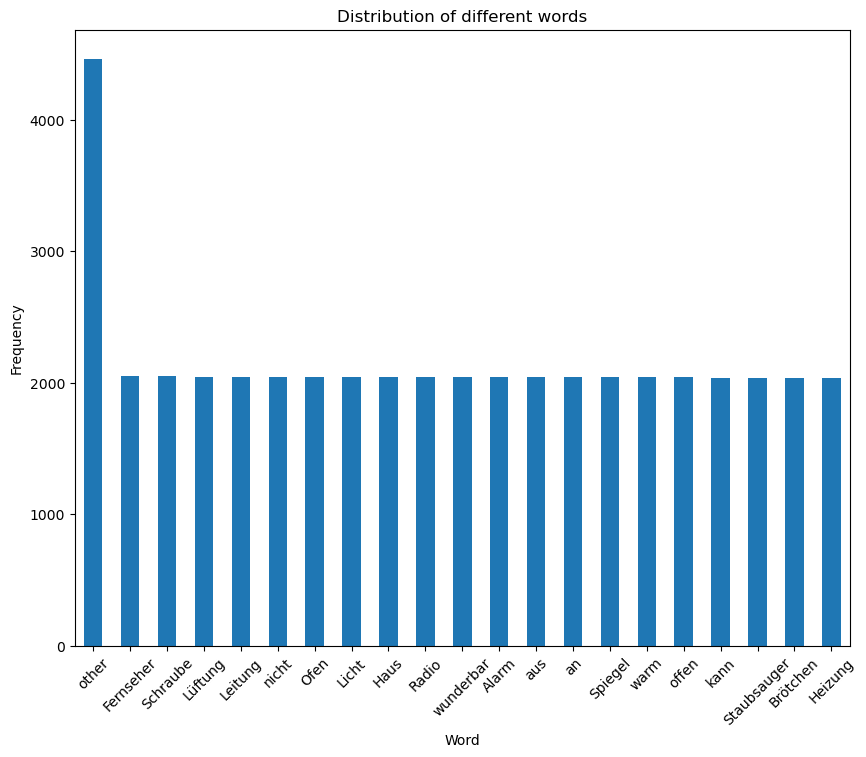

In [3]:
# Count the occurrences of each unique word
word_counts = development_df['word'].value_counts()
print(word_counts)
# visualize the distribution
plt.figure(figsize=(10, 8))
word_counts.plot(kind='bar')
plt.title('Distribution of different words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [4]:
# label words to category
word_to_category = {
    "Fernseher": "Devices",
    "Heizung": "Appliances",
    "Lüftung": "Appliances",
    "Ofen": "Appliances",
    "Radio": "Devices",
    "Staubsauger": "Appliances",
    "Licht": "Devices",
    "Alarm": "Devices",
    "an": "Commands",
    "aus": "Commands",
    "warm": "Status",
    "offen": "Status",
    "Leitung": "Objects",
    "Spiegel": "Objects",
    "Brötchen": "Objects",
    "Haus": "Objects",
    "Schraube": "Objects",
    "kann": "Miscellaneous",
    "nicht": "Miscellaneous",
    "wunderbar": "Miscellaneous",
    "other": "Miscellaneous"
}

# Map each word to its category
development_df['Category'] = development_df['word'].apply(lambda x: word_to_category.get(x, 'Unknown'))

# Display the first rows
print(development_df.head())

   id                 filename  speaker_id         word       Category
0   0     words/Brötchen/1.wav           1     Brötchen        Objects
1   1         words/kann/1.wav           1         kann  Miscellaneous
2   2  words/Staubsauger/1.wav           1  Staubsauger     Appliances
3   3      words/Spiegel/1.wav           1      Spiegel        Objects
4   4        words/Alarm/1.wav           1        Alarm        Devices


### Based on the idea to provide context and meaning to the words, they were categorized into the classifications Devices, Appliances, Commands, Status, Objects, and Miscellaneous. Which would be beneficial for the classification task, to separate words with similar sounds, such as Ofen and offen.


# b) Are the resulting classes unbalanced? If so, how much?

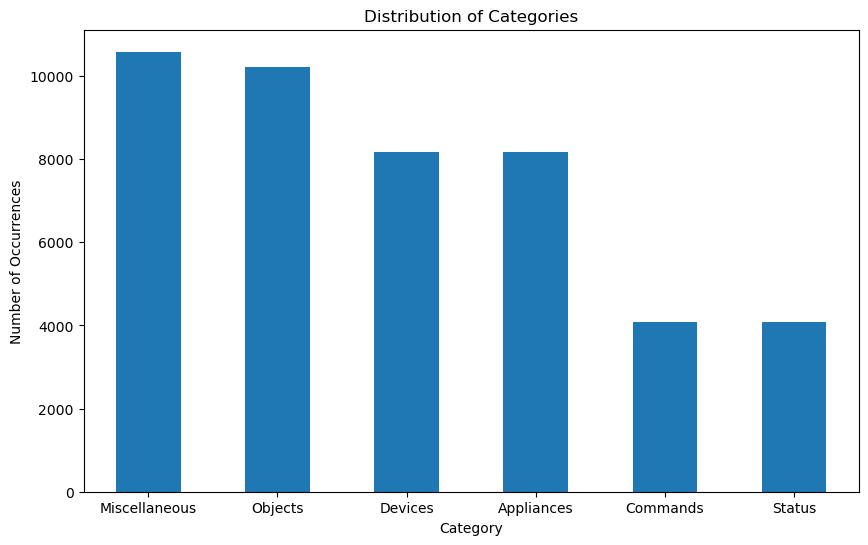

In [5]:
# Count occurrences of each category
category_counts = development_df['Category'].value_counts()

# Visualize the distribution
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Categories')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=0)
plt.show()

In [6]:
# calculate the mean, standard deviation, minimum, maximum, and coefficient of variation
mean_samples = category_counts.mean()
std_deviation = category_counts.std()
min_samples = category_counts.min()
max_samples = category_counts.max()
coefficient_of_variation = (std_deviation / mean_samples) * 100

# Display the results
print(f"Mean number of samples per category: {mean_samples:.2f}")
print(f"Standard deviation: {std_deviation:.2f}")
print(f"Minimum number of samples in a category: {min_samples}")
print(f"Maximum number of samples in a category: {max_samples}")
print(f"Coefficient of Variation (CV): {coefficient_of_variation:.2f}%")

Mean number of samples per category: 7549.33
Standard deviation: 2868.60
Minimum number of samples in a category: 4079
Maximum number of samples in a category: 10587
Coefficient of Variation (CV): 38.00%


### A histogram used to visualize these groups shows a noticeable imbalance between them. An obvious indicator of this imbalance is the Coefficient of Variance, which comes out to be 38%. If this isn't dealt with properly, the model may become biased in favor of the majority class, which would affect performance. Data augmentation, especially on the minority classes can be used as a potential approach to balance the classes for an attempt on improving model performance. 


## Mind Map Creaation

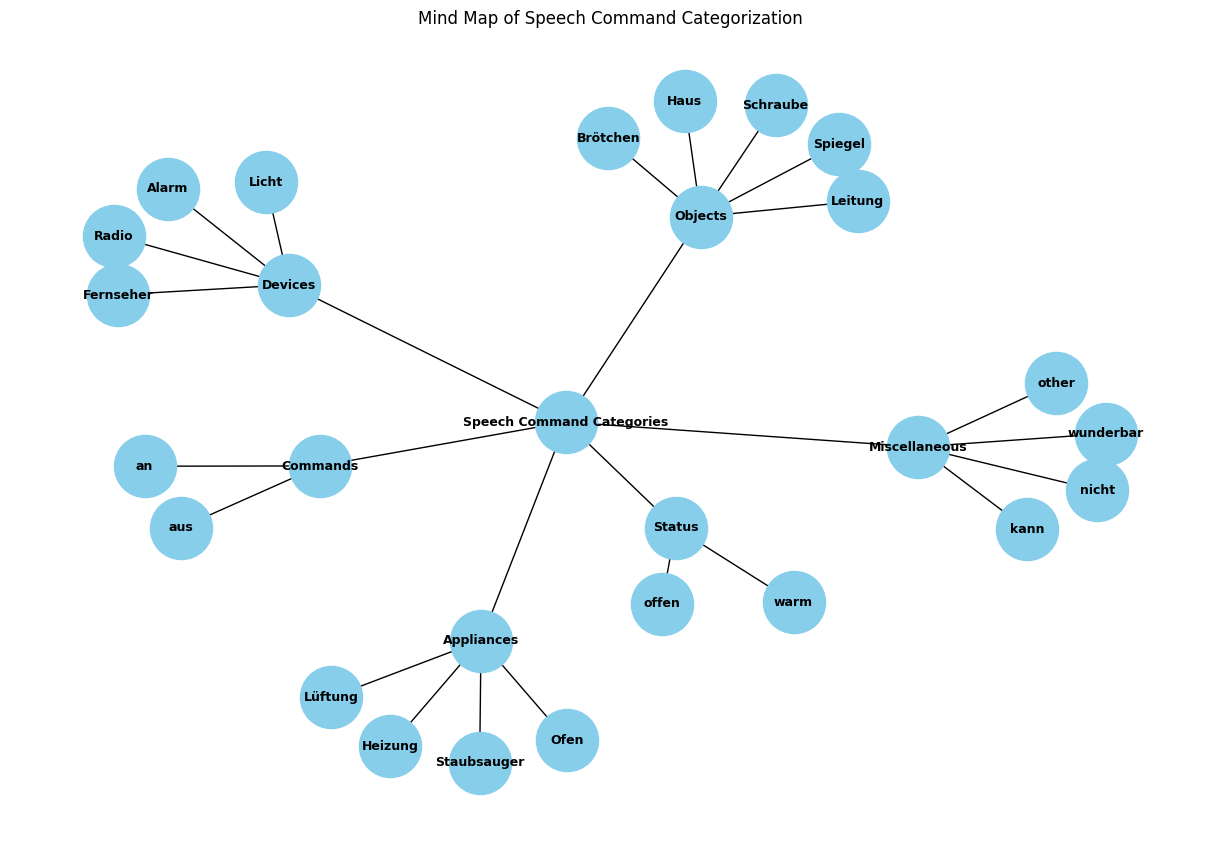

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

def create_mind_map():
    # Create a new graph
    G = nx.Graph()

    # Add nodes
    root = "Speech Command Categories"
    categories = ["Devices", "Appliances", "Commands", "Status", "Objects", "Miscellaneous"]
    items = {
        "Devices": ["Fernseher", "Radio", "Licht", "Alarm"],
        "Appliances": ["Heizung", "Lüftung", "Ofen", "Staubsauger"],
        "Commands": ["an", "aus"],
        "Status": ["warm", "offen"],
        "Objects": ["Leitung", "Spiegel", "Brötchen", "Haus", "Schraube"],
        "Miscellaneous": ["kann", "nicht", "wunderbar", "other"]
    }

    # Add nodes and edges for each category
    for category in categories:
        G.add_node(category)
        G.add_edge(root, category)
        for item in items[category]:
            G.add_node(item)
            G.add_edge(category, item)

    # Position nodes using a spring layout
    pos = nx.spring_layout(G, seed=42)

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=9, font_weight='bold')
    plt.title('Mind Map of Speech Command Categorization')
    plt.savefig('fig/mindmap_command_grouping.png')
    plt.show()

create_mind_map()
